# ***`Convolutional Neural Networks `***

### Packages & Modules

In [1]:
#Import Packages & Modules

import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

### Dataset


In [2]:
# DataLoader (The CIFAR10 dataset) ~ 60 000 color images in 10 classes, with 6 000 images in each class. 

   # Process the data and split into a training and test set
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

 #The dataset is divided into 50 000 training images and 10 000 testing images.
print("The training set ", train_images.shape) 
print("The test set ",test_images.shape) 

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

The training set  (50000, 32, 32, 3)
The test set  (10000, 32, 32, 3)


### Plotting Images

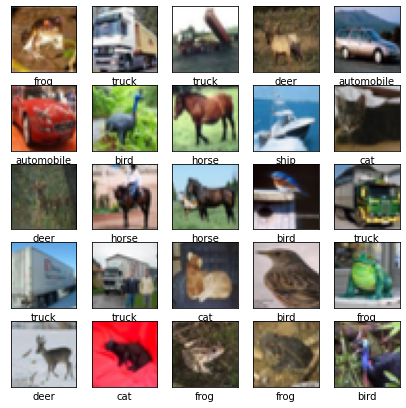

In [3]:
#Verification of the data
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(7,7))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)

    plt.xlabel(class_names[train_labels[i][0]])
plt.show()


### Construct the Model

In [4]:
#Create the Convolutional Base using a stack of Conv2D and MaxPooling2D layers
# (image_height, image_width, color_channels) ~ (32, 32, 3)
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [5]:
#Layers
model.layers

In [6]:
#Summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


### Add Dense Layers on Top

In [7]:
# Feeding the last output tensor from the convolutional base (of shape (4, 4, 64)) into one or more Dense layers to perform classification.
# Dense layers take vectors as input (which are 1D), while the current output is a 3D tensor. 
    #Flatten (or unroll) the 3D output to 1D
    #Add one or more Dense layers on top
# CIFAR has 10 output classes, (Use a final Dense layer with 10 outputs and a softmax activation).


model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [8]:
#Layers
model.layers

In [9]:
#Summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

### Compile & Train the Model

In [10]:
#Training on 50000 samples, validating on 10000 samples

model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 64s 41ms/step - loss: 1.5125 - accuracy: 0.4476 - val_loss: 1.2131 - val_accuracy: 0.5671
Epoch 2/10
1563/1563 [==============================] - 66s 42ms/step - loss: 1.1547 - accuracy: 0.5918 - val_loss: 1.1421 - val_accuracy: 0.5898
Epoch 3/10
1563/1563 [==============================] - 66s 42ms/step - loss: 1.0099 - accuracy: 0.6453 - val_loss: 0.9998 - val_accuracy: 0.6532
Epoch 4/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.9184 - accuracy: 0.6776 - val_loss: 0.9505 - val_accuracy: 0.6709
Epoch 5/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.8463 - accuracy: 0.7050 - val_loss: 0.9038 - val_accuracy: 0.6876
Epoch 6/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.7961 - accuracy: 0.7227 - val_loss: 0.9123 - val_accuracy: 0.6838
Epoch 7/10
1563/1563 [==============================] - 68s 44ms/step - loss: 0.7406 - accuracy: 0.7407 - val_loss: 0.9100 -

### Evaluate the Model

313/313 - 3s - loss: 0.8501 - accuracy: 0.7117


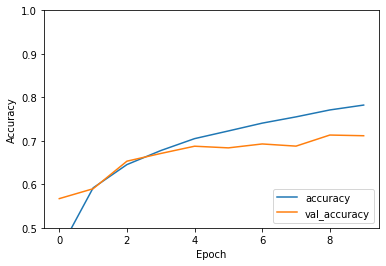

In [11]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [12]:
print("Test Accuracy : ", test_acc)

Test Accuracy :  0.7117000222206116


--> The simple CNN has achieved a test accuracy of over 70%.

### Adding More Layers & Epochs

In [13]:
model_1 = models.Sequential()
model_1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_1.add(layers.MaxPooling2D((2, 2)))
model_1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_1.add(layers.MaxPooling2D((2, 2)))
model_1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_1.add(layers.MaxPooling2D((2, 2)))
model_1.add(layers.Flatten())
model_1.add(layers.Dense(64, activation='relu'))
model_1.add(layers.Dense(10))

In [15]:
model_1.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
history_1 = model_1.fit(train_images, train_labels, epochs=20, validation_data=(test_images, test_labels))

Epoch 1/20
1563/1563 [==============================] - 65s 42ms/step - loss: 1.5625 - accuracy: 0.4291 - val_loss: 1.2752 - val_accuracy: 0.5358
Epoch 2/20
1563/1563 [==============================] - 64s 41ms/step - loss: 1.2139 - accuracy: 0.5696 - val_loss: 1.1134 - val_accuracy: 0.6069
Epoch 3/20
1563/1563 [==============================] - 64s 41ms/step - loss: 1.0604 - accuracy: 0.6287 - val_loss: 1.0362 - val_accuracy: 0.6398
Epoch 4/20
1563/1563 [==============================] - 64s 41ms/step - loss: 0.9699 - accuracy: 0.6618 - val_loss: 1.0036 - val_accuracy: 0.6518
Epoch 5/20
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8911 - accuracy: 0.6878 - val_loss: 0.9483 - val_accuracy: 0.6714
Epoch 6/20
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8439 - accuracy: 0.7059 - val_loss: 0.9093 - val_accuracy: 0.6905
Epoch 7/20
1563/1563 [==============================] - 64s 41ms/step - loss: 0.7935 - accuracy: 0.7247 - val_loss: 0.9566 -

313/313 - 3s - loss: 0.9973 - accuracy: 0.7007


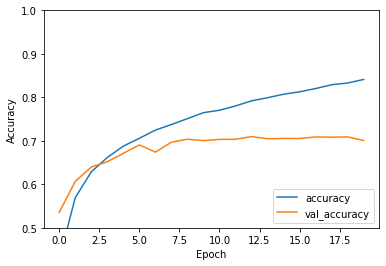

In [16]:
plt.plot(history_1.history['accuracy'], label='accuracy')
plt.plot(history_1.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss_1, test_acc_1 = model_1.evaluate(test_images,  test_labels, verbose=2)

In [17]:
print("Test Accuracy : ", test_acc_1)

Test Accuracy :  0.7006999850273132
